In [187]:
import pandas as pd

In [188]:
df = pd.read_csv("./Data/soccer.csv")
#df.head()
df.head()

,Column1,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20,4,0,0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9,1,0,0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10,1,0,0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10,0,0,1,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10,2,0,0,0,1,1,0,2014,english


In [189]:
# keep only these cols
df = df[['Home Team', 'Away Team', 'Home Team Goals Scored', 'Away Team Goals Scored', 'year', 'league']]

# Drop rows where 'year' is less than 2018
df = df[df['year'] >= 2016]

df.head()

,Home Team,Away Team,Home Team Goals Scored,Away Team Goals Scored,year,league
760,HULL CITY,LEICESTER CITY,2,1,2016,english
761,EVERTON,TOTTENHAM,1,1,2016,english
762,MIDDLESBROUGH,STOKE,1,1,2016,english
763,BURNLEY,SWANSEA,0,1,2016,english
764,SOUTHAMPTON,WATFORD,1,1,2016,english


In [190]:
#df.info()

In [191]:
df['Total Game Goals'] = df['Home Team Goals Scored'] + df['Away Team Goals Scored']

In [192]:
df.head()

,Home Team,Away Team,Home Team Goals Scored,Away Team Goals Scored,year,league,Total Game Goals
760,HULL CITY,LEICESTER CITY,2,1,2016,english,3
761,EVERTON,TOTTENHAM,1,1,2016,english,2
762,MIDDLESBROUGH,STOKE,1,1,2016,english,2
763,BURNLEY,SWANSEA,0,1,2016,english,1
764,SOUTHAMPTON,WATFORD,1,1,2016,english,2


In [193]:
df_grouped = df.groupby(['league', 'year'])['Total Game Goals'].sum().reset_index()

df_grouped

,league,year,Total Game Goals
0,english,2016,1064
1,english,2017,1018
2,english,2018,1072
3,english,2019,1034
4,english,2020,1024
5,french,2016,991
6,french,2017,1033
7,french,2018,972
8,french,2019,695
9,french,2020,1049


In [194]:
import matplotlib.pyplot as plt

In [195]:
# Pivot the DataFrame to get years as columns
df_pivot = df_grouped.pivot(index='league', columns='year', values='Total Game Goals')

df_pivot.head()

year,2016,2017,2018,2019,2020
league,,,,,
english,1064,1018,1072,1034,1024
french,991,1033,972,695,1049
german,877,855,973,982,928
italian,1120,1017,1019,1154,1160
spanish,1118,1024,983,942,953


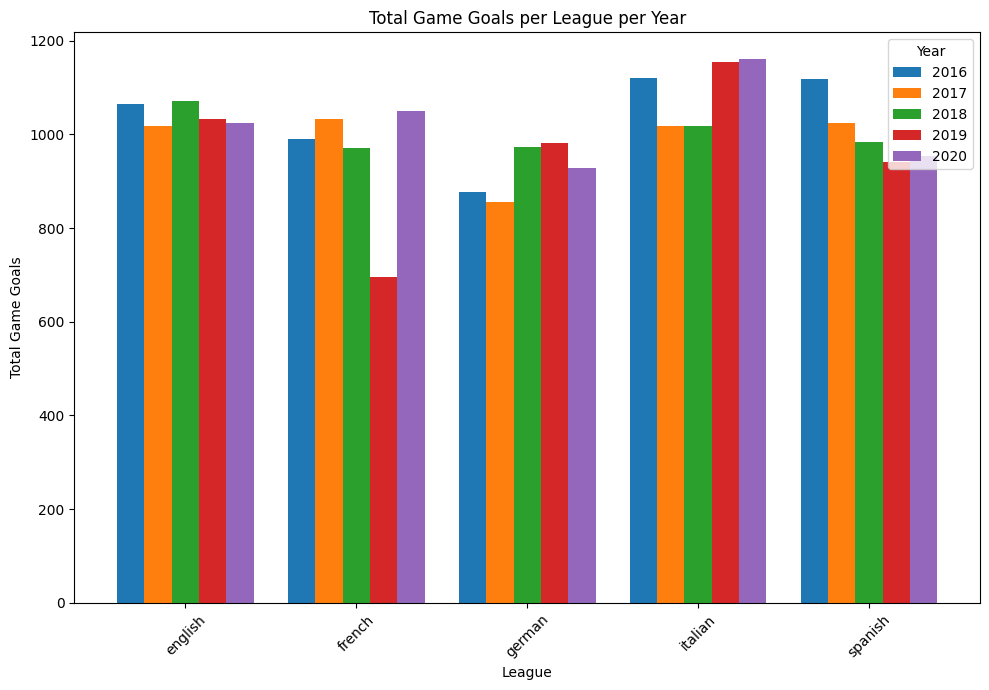

In [196]:

# Plotting
ax = df_pivot.plot(kind='bar', figsize=(10, 7), width=0.8)

# Customize the plot
ax.set_xlabel('League')
ax.set_ylabel('Total Game Goals')
ax.set_title('Total Game Goals per League per Year')
ax.legend(title='Year')

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [197]:
import seaborn as sns

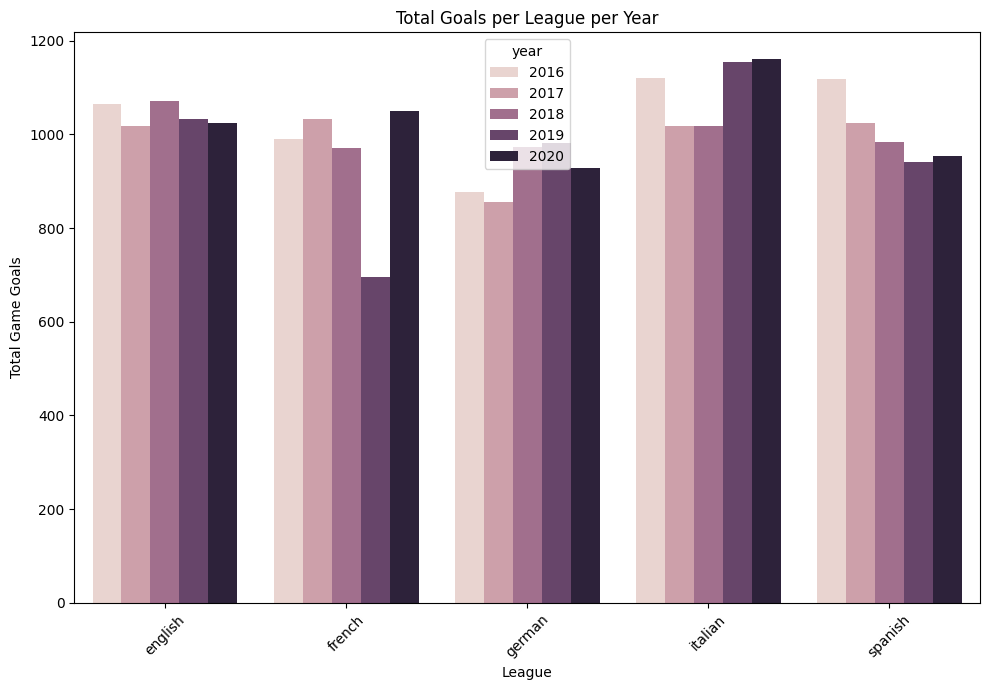

In [198]:
# Initialize the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a barplot
sns.barplot(data=df_grouped, x='league', y='Total Game Goals', hue='year')

# Customize the plot
plt.xlabel('League')
plt.ylabel('Total Game Goals')
plt.title('Total Goals per League per Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Calculate total goals for each team as home team
home_goals = df.groupby(['Home Team', 'year'])['Home Team Goals Scored'].sum().reset_index()
home_goals.columns = ['Team', 'year', 'Total Goals']

# Calculate total goals for each team as away team
away_goals = df.groupby(['Away Team', 'year'])['Away Team Goals Scored'].sum().reset_index()
away_goals.columns = ['Team', 'year', 'Total Goals']

# Combine home and away goals
total_goals = pd.concat([home_goals, away_goals])

# Aggregate total goals per team per year
total_goals = total_goals.groupby(['Team', 'year'])['Total Goals'].sum().reset_index()

In [199]:
# Calculate total goals for each team as home team
home_goals = df.groupby(['Home Team', 'year', 'league'])['Home Team Goals Scored'].sum().reset_index()
home_goals.columns = ['Team', 'year', 'league', 'Total Home Goals']

home_goals.loc[home_goals['Team'] == 'ARSENAL']

,Team,year,league,Total Home Goals
17,ARSENAL,2016,english,39
18,ARSENAL,2017,english,54
19,ARSENAL,2018,english,42
20,ARSENAL,2019,english,36
21,ARSENAL,2020,english,24


In [200]:
# Calculate total goals for each team as away team
away_goals = df.groupby(['Away Team', 'year', 'league'])['Away Team Goals Scored'].sum().reset_index()
away_goals.columns = ['Team', 'year', 'league', 'Total Away Goals']
away_goals.loc[home_goals['Team'] == 'ARSENAL']

,Team,year,league,Total Away Goals
17,ARSENAL,2016,english,38
18,ARSENAL,2017,english,20
19,ARSENAL,2018,english,31
20,ARSENAL,2019,english,20
21,ARSENAL,2020,english,31


In [201]:
# Combine home and away goals
#total_goals = pd.concat([home_goals, away_goals])
total_goals = pd.merge(home_goals, away_goals, on=["Team", "year", "league"])
total_goals.head()

,Team,year,league,Total Home Goals,Total Away Goals
0,1. FC KÃ–LN,2016,german,29,22
1,1. FC KÃ–LN,2017,german,20,15
2,1. FC KÃ–LN,2019,german,28,23
3,1. FC KÃ–LN,2020,german,20,14
4,ALAVÃ‰S,2016,spanish,19,22


In [202]:
total_goals['Total Goals'] = total_goals['Total Home Goals'] + total_goals['Total Away Goals']

total_goals.drop(columns=['Total Home Goals', 'Total Away Goals'], inplace=True)

total_goals.loc[total_goals['Team'] == 'ARSENAL']

,Team,year,league,Total Goals
17,ARSENAL,2016,english,77
18,ARSENAL,2017,english,74
19,ARSENAL,2018,english,73
20,ARSENAL,2019,english,56
21,ARSENAL,2020,english,55


In [203]:
total_goals.head()

,Team,year,league,Total Goals
0,1. FC KÃ–LN,2016,german,51
1,1. FC KÃ–LN,2017,german,35
2,1. FC KÃ–LN,2019,german,51
3,1. FC KÃ–LN,2020,german,34
4,ALAVÃ‰S,2016,spanish,41


In [204]:
# Sort the DataFrame by 'league', 'year', and 'Total Goals' in descending order
df_sorted = total_goals.sort_values(by=['league', 'year', 'Total Goals'], ascending=[True, True, False])

# Function to select top 5 teams by goals scored within each group
def select_top_5_teams(group):
    return group.head(5)

# Group by 'league' and 'year', apply the function to select top 5 teams
df_top_teams = df_sorted.groupby(['league', 'year']).apply(select_top_5_teams).reset_index(drop=True)

df_top_teams.head(10)

C:\Users\moeme\AppData\Local\Temp\ipykernel_24268\2279742268.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_teams = df_sorted.groupby(['league', 'year']).apply(select_top_5_teams).reset_index(drop=True)


,Team,year,league,Total Goals
0,TOTTENHAM,2016,english,86
1,CHELSEA,2016,english,85
2,MAN CITY,2016,english,80
3,LIVERPOOL,2016,english,78
4,ARSENAL,2016,english,77
5,MAN CITY,2017,english,106
6,LIVERPOOL,2017,english,84
7,ARSENAL,2017,english,74
8,TOTTENHAM,2017,english,74
9,MAN UTD,2017,english,68


c:\Users\moeme\OneDrive\Desktop\Training\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\moeme\OneDrive\Desktop\Training\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\moeme\OneDrive\Desktop\Training\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\moeme\OneDrive\Desktop\Training\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\moeme\OneDrive\Desktop\Training\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is dep

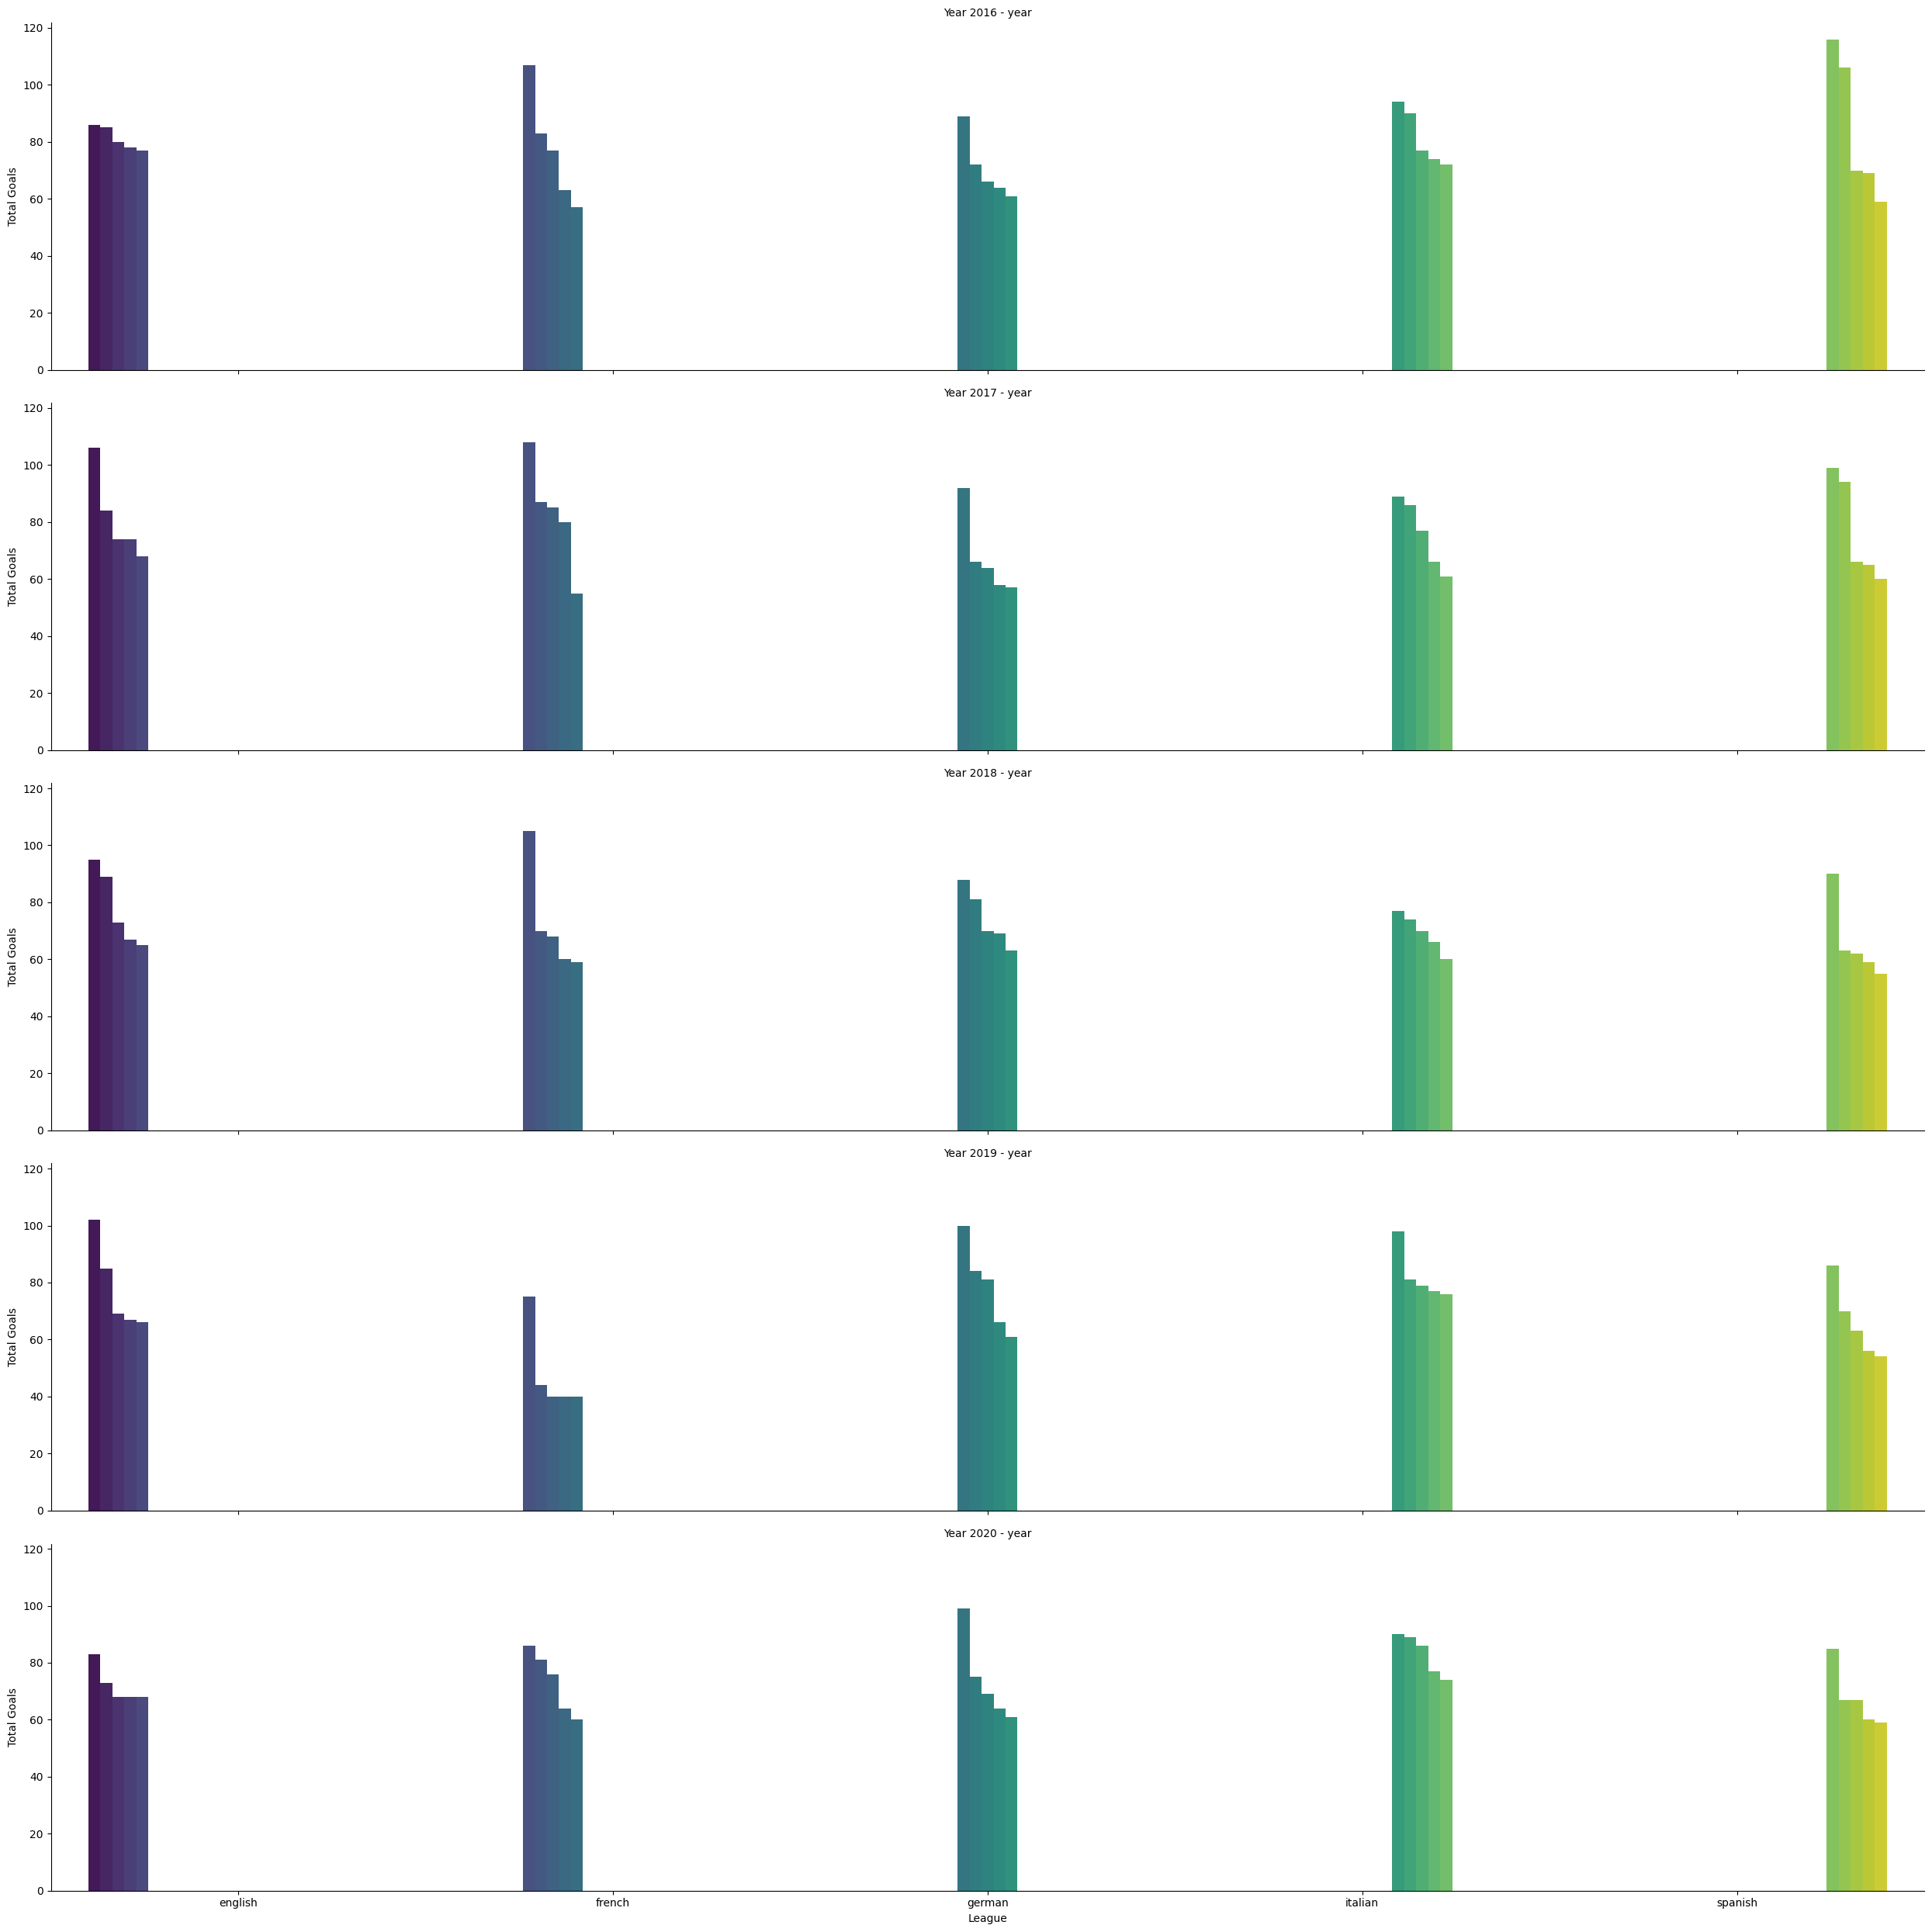

In [205]:
# Sort the DataFrame by 'league', 'year', and 'Total Goals' in descending order
df_sorted = df_top_teams.sort_values(by=['league', 'year', 'Total Goals'], ascending=[True, True, False])

# Initialize FacetGrid with Seaborn, stacking plots vertically
g = sns.FacetGrid(df_sorted, col='year', col_wrap=1, height=5, aspect=5)  # Adjust aspect here

# Plotting each subplot
g.map_dataframe(sns.barplot, x='league', y='Total Goals', hue='Team', ci=None, palette='viridis', dodge=True)

# Customize the plot
g.set_axis_labels('League', 'Total Goals')
g.set_titles('Year {col_name} - {col_var}')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()